In [107]:
import pandas as pd
import numpy as np
import math
data = pd.DataFrame({
    'Student_id': [1,2,3,4,5,6,7,8,9,10],
    'Name': ['Soham','Avanti','Yash','Shraddha','Mangesh','Vaishnavi','Sumit','Atharva','Rohan','Paras'],
    'Age':[20,21,19,20,np.nan,20,19,21,18,19],
    'Gender':['M','F','M','F','M','F','M','M','M','M'],
    'Math_score':[99,98,89,90,97,95,np.nan,75,59,100],
    'Science_score':[89,91,90,np.nan,85,87,79,75,69,95]
})

df = data

In [108]:
df.isnull().sum()

Student_id       0
Name             0
Age              1
Gender           0
Math_score       1
Science_score    1
dtype: int64

In [109]:
df1 = df.fillna({'Age':round(df['Age'].mean()),
          'Math_score':round(df['Math_score'].mean()),
          'Science_score': round(df['Science_score'].mean())})
df1['Age'] = df1['Age'].astype(int)
df1

,Student_id,Name,Age,Gender,Math_score,Science_score
0,1,Soham,20,M,99.0,89.0
1,2,Avanti,21,F,98.0,91.0
2,3,Yash,19,M,89.0,90.0
3,4,Shraddha,20,F,90.0,84.0
4,5,Mangesh,20,M,97.0,85.0
5,6,Vaishnavi,20,F,95.0,87.0
6,7,Sumit,19,M,89.0,79.0
7,8,Atharva,21,M,75.0,75.0
8,9,Rohan,18,M,59.0,69.0
9,10,Paras,19,M,100.0,95.0


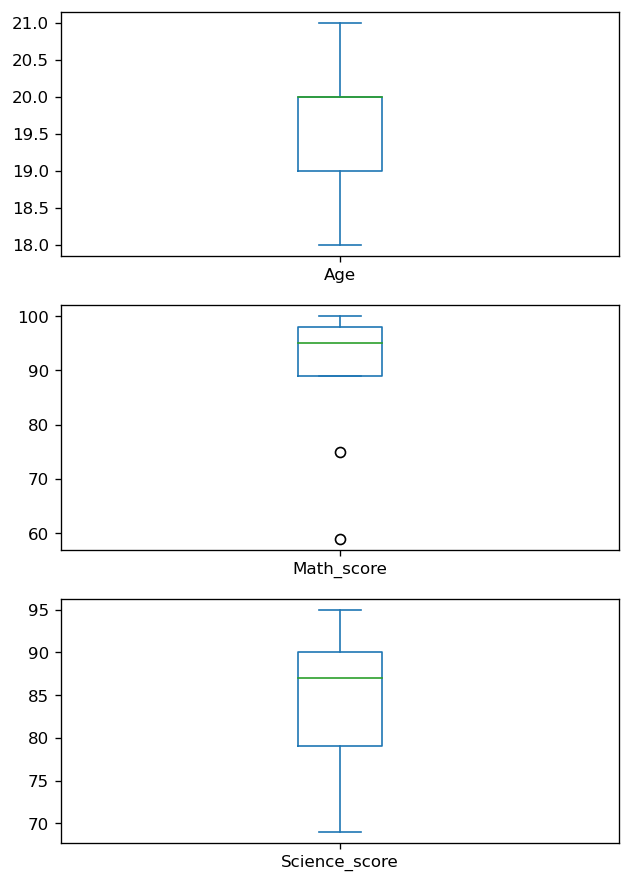

In [110]:
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (6,9)
df_list = ['Age', 'Math_score', 'Science_score'] 
fig, axes = plt.subplots(3)
fig.set_dpi(120)
count=0
for r in range(3):
    df[df_list[count]].plot(kind = 'box', ax=axes[r])
    count+=1

In [111]:
Q1 = df['Math_score'].quantile(0.25)
Q3 = df['Math_score'].quantile(0.75)
IQR = Q3 - Q1
Lower_limit = Q1 - 1.5 * IQR
Upper_limit = Q3 + 1.5 * IQR
print(f'Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}, Lower_limit = {Lower_limit}, Upper_limit = {Upper_limit}')


Q1 = 89.0, Q3 = 98.0, IQR = 9.0, Lower_limit = 75.5, Upper_limit = 111.5


In [112]:
df[(df['Math_score'] < Lower_limit) | (df['Math_score'] > Upper_limit)]

,Student_id,Name,Age,Gender,Math_score,Science_score
7,8,Atharva,21.0,M,75.0,75.0
8,9,Rohan,18.0,M,59.0,69.0


In [113]:
df[(df['Math_score'] < Lower_limit) & (df['Math_score'] > Upper_limit)]

,Student_id,Name,Age,Gender,Math_score,Science_score


In [114]:
df2 = df[df['Math_score'] > Lower_limit]
df2

,Student_id,Name,Age,Gender,Math_score,Science_score
0,1,Soham,20.0,M,99.0,89.0
1,2,Avanti,21.0,F,98.0,91.0
2,3,Yash,19.0,M,89.0,90.0
3,4,Shraddha,20.0,F,90.0,NaN
4,5,Mangesh,NaN,M,97.0,85.0
5,6,Vaishnavi,20.0,F,95.0,87.0
9,10,Paras,19.0,M,100.0,95.0


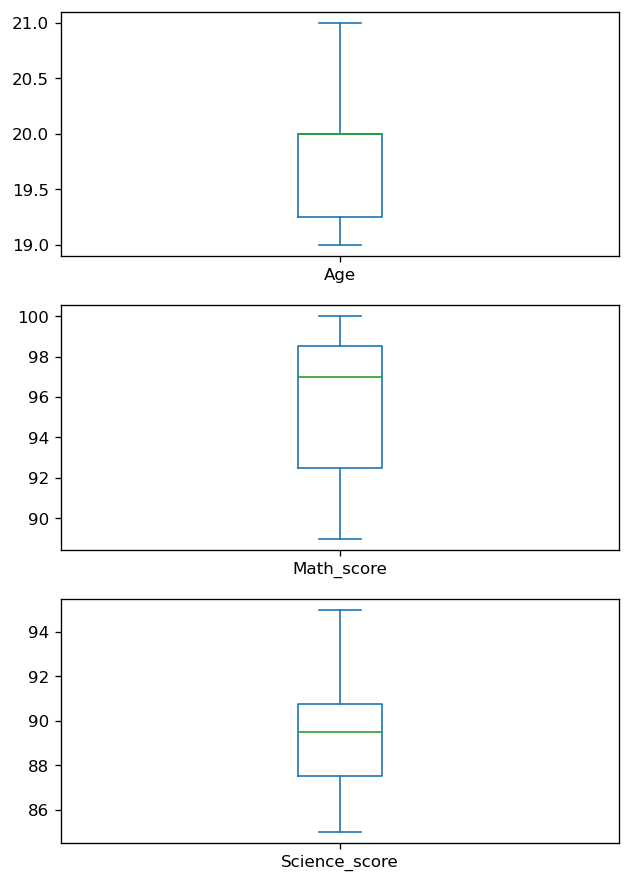

In [115]:
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (6,9)
df2_list = ['Age', 'Math_score', 'Science_score'] 
fig, axes = plt.subplots(3)
fig.set_dpi(120)
count=0
for r in range(3):
    df2[df2_list[count]].plot(kind = 'box', ax=axes[r])
    count+=1

In [116]:
# Apply min-max normalization on the 'Math_Score' variable
df['Math_score_scaled'] = (df['Math_score'] - df['Math_score'].min()) / (df['Math_score'].max() - df['Math_score'].min())

In [117]:
df

,Student_id,Name,Age,Gender,Math_score,Science_score,Math_score_scaled
0,1,Soham,20.0,M,99.0,89.0,0.975610
1,2,Avanti,21.0,F,98.0,91.0,0.951220
2,3,Yash,19.0,M,89.0,90.0,0.731707
3,4,Shraddha,20.0,F,90.0,NaN,0.756098
4,5,Mangesh,NaN,M,97.0,85.0,0.926829
5,6,Vaishnavi,20.0,F,95.0,87.0,0.878049
6,7,Sumit,19.0,M,NaN,79.0,NaN
7,8,Atharva,21.0,M,75.0,75.0,0.390244
8,9,Rohan,18.0,M,59.0,69.0,0.000000
9,10,Paras,19.0,M,100.0,95.0,1.000000
